In [7]:
import pandas as pd
from qiskit.qasm3 import loads as qasm3_loads
import matplotlib.pyplot as plt


In [8]:
df = pd.read_json("../data/hadamard_mutations.json")
def get_circuit_stats(qasm):
    qc = qasm3_loads(qasm)
    return {
        "num_qubits": qc.num_qubits,
        "depth": qc.depth(),
        "num_gates": len(qc.data),
    }

In [9]:
original_stats = df["original_qasm"].apply(get_circuit_stats).apply(pd.Series)
mutated_stats = df["mutated_qasm"].apply(get_circuit_stats).apply(pd.Series)

df = pd.concat([df, original_stats.add_prefix("orig_"), mutated_stats.add_prefix("mut_")], axis=1)

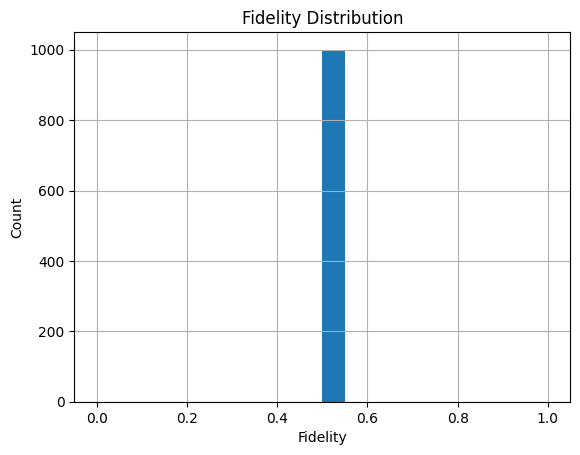

In [10]:
# 📊 Step 3: Fidelity distribution
df["fidelity"].hist(bins=20)
plt.title("Fidelity Distribution")
plt.xlabel("Fidelity")
plt.ylabel("Count")
plt.show()

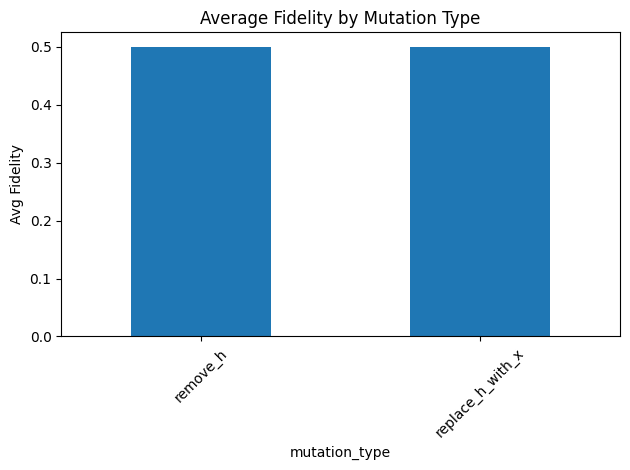

In [11]:
# 🔍 Step 4: Mutation effect
df.groupby("mutation_type")["fidelity"].mean().plot(kind="bar")
plt.title("Average Fidelity by Mutation Type")
plt.ylabel("Avg Fidelity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()